#### Theory

#### a. Based on a 95% confidence level, which features are statistically significant?

1. If the significance level is 0.05, the corresponding confidence level is 95%. If the P value is less than the significance (alpha) level, the hypothesis test is statistically significant.
2. Answer: x4, x5, & x7

#### b.	What is the meaning of the negative coefficients (for x2, x5, and x6)? 

1. Negative coefficients indicate that the event is less likely at that level of the predictor than at the reference level. Positive coefficients indicate that the event becomes more likely and negative coefficients indicate that the event becomes less likely.
2. Negative coefficient means the relationship of the independent variable and its dependent is negative. In other words, if one variable goes higher the other will be lower.
3. A negative coefficient has odds < 1, implying odds of the event occurring are lower than the baseline; conversely, a positive coefficient has odds > 1, implying increased odds of observing event relative to baseline.

### c. Please find the Odds Ratio (OR) for all input features (x1, x2, x3, x4, x5, x6, x7) (7 points).

In [115]:
import math
x1 = math.exp(0.2697623)
print( 'The odds ratio for x1 is %.6f' %x1)
x2 = math.exp(-0.2500592)
print( 'The odds ratio for x1 is %.6f' %x2)
x3 = math.exp(0.1150445)
print( 'The odds ratio for x3 is %.6f' %x3)
x4 = math.exp(0.3649722)
print( 'The odds ratio for x4 is %.6f' %x4)
x5 = math.exp(-0.3131214)
print( 'The odds ratio for x5 is %.6f' %x5)
x6 = math.exp(-0.1361499)
print( 'The odds ratio for x6 is %.6f' %x6)
x7 = math.exp(3.206987)
print( 'The odds ratio for x7 is %.6f' %x7)


The odds ratio for x1 is 1.309653
The odds ratio for x1 is 0.778755
The odds ratio for x3 is 1.121923
The odds ratio for x4 is 1.440474
The odds ratio for x5 is 0.731161
The odds ratio for x6 is 0.872712
The odds ratio for x7 is 24.704539


#### d.	For x1, if x1 increases 3 units, how much is the corresponding odds for class=1 changed compared to the baseline? Please show your work.

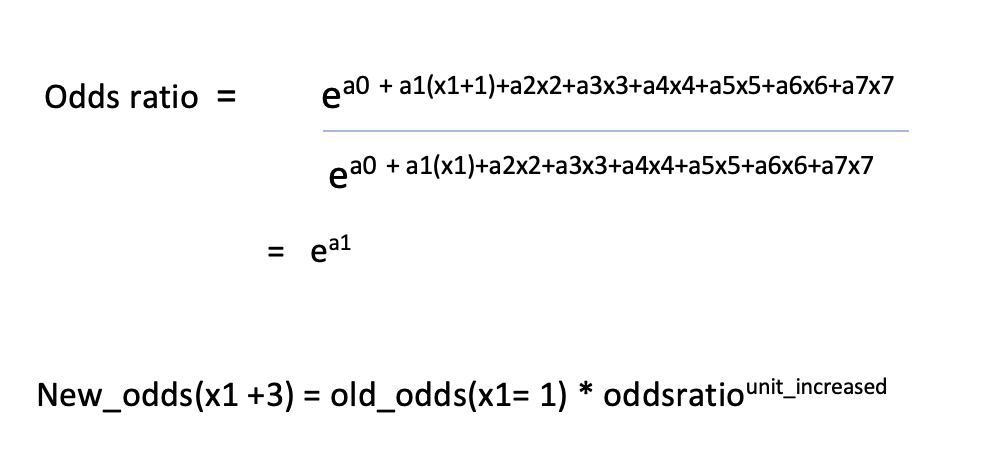

In [18]:
from IPython.display import Image
Image(filename='HW-5.png',width=800, height=400) 

In [5]:
import math
x1 = math.exp(0.2697623)
new_x1 = x1**3
print( 'The new odds ratio for x1 is %.4f' %new_x1)
print( 'The changed compared to baseline is {:.4f}'.format(new_x1/ x1))

The new odds ratio for x1 is 2.2463
The changed compared to baseline is 1.7152


#### e.For x4 (unit = 1), when x4 = 1, the odds was 1. What is the probability of class =1? If x4=3, what is the probability of class=1? Please show your work. 

                           Probability = Odds/ (1 + odds)
                           
                           new_odds = old_odds * odds_ratio
    

In [29]:
odd = 1
prob = odd/ (1 + odd)

print( 'The probability of class=1 when x4 is equal to 1 is %.1f' %prob)


The probability of class=1 when x4 is equal to 1 is 0.5


In [6]:
import math
odd = 1
x4 = math.exp(0.3649722)
units_increased = 2
new_odd = odd * (x4 ** units_increased)
new_probability = new_odd/(1+ new_odd)
print( 'The probability of class=1 when x4 = 3: %.3f' %new_probability)




The probability of class=1 when x4 = 3: 0.675


### Practice: 	
1. Find “UniversalBank.csv” and load it using pandas.
2.	Split data into input and output (outcome) (10 points)
a.	For input features (11 features): ‘Age’, ‘Experience’, ‘Income’, ‘Family’, ‘CCAvg’, ‘Education’, ‘Mortgage’, ‘SecuritiesAccount’, ‘CDAccount’, ‘Online’, ‘CreditCard’
b.	For outcome: “PersonalLoan”
3.	Use LogisticRegression in sckitlearn and do classification using 30% for testing (10 points)
4.	Draw confusion matrix (5 points)
5.	Draw the ROC curve and cumulative gain chart. (5 points)
6.	Use sm.Logit (add ‘Intercept=1’ in the input features) and check all coefficients. (10 points)
7.	The default option for sm.Logit does not provide us the odd ratio. Please calculate the odds ratio for each input features. (10 points)
8.	Choose only important features (based on 99% confidence level) and do classification again via LogisticRegression in sckitlearn (please use the same parameter sets as #3) using 30% for test data and draw confusion matrix. (10 points)


In [1]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve

In [3]:
df = pd.read_csv('UniversalBank.csv')   #loading csv file using pandas
df.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
X = pd.DataFrame(df, columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'])
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [5]:
Y = pd.DataFrame( df, columns = ['PersonalLoan'])
Y

,PersonalLoan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3 , random_state = 1)

In [22]:
logistic = LogisticRegression(solver ='liblinear', penalty = 'l2', C = 0.001, random_state = 1 )
logistic.fit(X_train, y_train)

/Users/sukritimishra/opt/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
y_prob = logistic.predict_proba(X_test)
y_prob[:6]

array([[0.92587549, 0.07412451],
       [0.98110691, 0.01889309],
       [0.98351752, 0.01648248],
       [0.90464119, 0.09535881],
       [0.92939347, 0.07060653],
       [0.99054637, 0.00945363]])

In [28]:
print('intercept:', logistic.intercept_)
print('coefficient:', logistic.coef_[0])

intercept: [-0.0199847]
coefficient: [-0.21676529  0.19688232  0.03012252  0.09282242  0.04877323  0.13306541
  0.00070462  0.00283525  0.05019306 -0.01270932 -0.00743428]


In [9]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix

,Predict[0],Predict[1]
True[0],1323,28
True[1],107,42


In [10]:
print('Classification Report')
print(classification_report(y_test, y_pred))


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.60      0.28      0.38       149

    accuracy                           0.91      1500
   macro avg       0.76      0.63      0.67      1500
weighted avg       0.89      0.91      0.90      1500



In [11]:
print('Accuracy is : {:.2%}'.format(accuracy_score(y_test, y_pred)))



Accuracy is : 91.00%


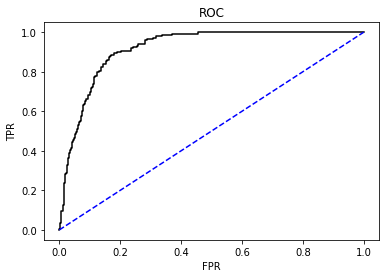

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, 'k')
plt.plot([0,1], [0,1], 'b--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC")
plt.show()


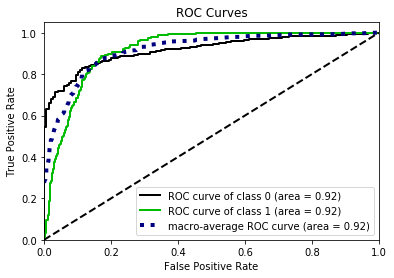

In [76]:
skplt.metrics.plot_roc(y_test, logistic.predict_proba(X_test), plot_micro = False)
plt.show()

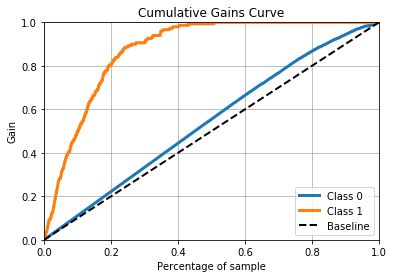

In [77]:
skplt.metrics.plot_cumulative_gain(y_test, logistic.predict_proba(X_test))
plt.show()

6.	Use sm.Logit (add ‘Intercept=1’ in the input features) and check all coefficients.

In [12]:
X['Intercept'] = 1
logistic_ml = sm.Logit(Y, X)
logistic_coef = logistic_ml.fit()
logistic_coef.summary()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Tue, 06 Oct 2020   Pseudo R-squ.:                  0.5938
Time:                        11:36:24   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                  -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience            0.0638      0.061      1.046      0.295      -0.056       0.183
Income                0.0546      0.003     20.831      0.000       0.049       0.060
Family                0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                 0.1240      0.040      3.127      0.002       0.046       0.202
Education             1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage              0.0005      0.001      0.856      0.392      -0.001       0.002
SecuritiesAccount    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CDAccount             3.8225      0.324     11.800      0.000       3.188       4.457
Online               -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard           -1.1197      0.205     -5.462      0.000      -1.522      -0.718
Intercept           -12.1927      1.645     -7.411      0.000     -15.417      -8.968
=====================================================================================
"""

7.	The default option for sm.Logit does not provide us the odd ratio. Please calculate the odds ratio for each input features.

In [13]:
import math
Age = math.exp(-0.0536)
print( 'The odds ratio for age : %.6f' %Age)
Experience = math.exp(0.0638)
print( 'The odds ratio for experience : %.6f' %Experience)
income = math.exp(0.0546)
print( 'The odds ratio for income : %.6f' %income)
family = math.exp(0.6958)
print( 'The odds ratio for family : %.6f' %family)
CCAvg = math.exp(0.1240)
print( 'The odds ratio for CCavg : %.6f' %CCAvg)
Education = math.exp(1.7362)
print( 'The odds ratio for  education : %.6f' %Education)
Mortgage = math.exp(0.0005)
print( 'The odds ratio for mortgage : %.6f' %Mortgage)
SecuritiesAccount = math.exp(-0.9368)
print( 'The odds ratio for SecuritiesAccount : %.6f' %SecuritiesAccount)
CDAccount = math.exp(3.8225)
print( 'The odds ratio for CDAccount : %.6f' %CDAccount)
Online = math.exp(-0.6752)
print( 'The odds ratio for online : %.6f' %Online)
CreditCard = math.exp(-1.1197)
print( 'The odds ratio for CreditCard : %.6f' %CreditCard)
intercept = math.exp(-12.1927)
print('The odds ratio for intercept : %.6f' %intercept)


The odds ratio for age : 0.947811
The odds ratio for experience : 1.065879
The odds ratio for income : 1.056118
The odds ratio for family : 2.005313
The odds ratio for CCavg : 1.132016
The odds ratio for  education : 5.675735
The odds ratio for mortgage : 1.000500
The odds ratio for SecuritiesAccount : 0.391880
The odds ratio for CDAccount : 45.718361
The odds ratio for online : 0.509055
The odds ratio for CreditCard : 0.326378
The odds ratio for intercept : 0.000005


#### 8.	Choose only important features (based on 99% confidence level) and do classification again via LogisticRegression in sckitlearn (please use the same parameter sets as #3) using 30% for test data and draw confusion matrix. 

If the significance level is 0.01, the corresponding confidence level is 99%.
If the P value is less than the significance (alpha) level, the hypothesis test is statistically significant. So, the important features are ['Income', 'Family', 'CCAvg', 'Education', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'].


In [97]:
X_1 = pd.DataFrame(df, columns=['Income', 'Family', 'CCAvg', 'Education', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'])
X_1

,Income,Family,CCAvg,Education,SecuritiesAccount,CDAccount,Online,CreditCard
0,49,4,1.6,1,1,0,0,0
1,34,3,1.5,1,1,0,0,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,1
...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,1,0
4996,15,4,0.4,1,0,0,1,0
4997,24,2,0.3,3,0,0,0,0
4998,49,3,0.5,2,0,0,1,0


In [98]:
Y = pd.DataFrame( df, columns = ['PersonalLoan'])
Y

,PersonalLoan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_1, Y, test_size = 0.3 , random_state = 1)

In [100]:
logistic = LogisticRegression(solver ='liblinear', penalty = 'l2', C = 0.001, random_state = 1 )
logistic.fit(X_train, y_train)

/Users/sukritimishra/opt/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
y_pred_new = logistic.predict(X_test)
y_pred_new

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
conf_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_pred_new), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_1

,Predict[0],Predict[1]
True[0],1351,0
True[1],149,0


In [103]:
print('Classification Report')
print(classification_report(y_test, y_pred_new))

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



/Users/sukritimishra/opt/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
print('New Accuracy is : {:.2%}'.format(accuracy_score(y_test, y_pred_new)))


New Accuracy is : 90.07%


In [1]:
import math

dict_distance = [(0.0459,-0.8537),
(-1.0778,0.8133),
 (0.0839,-0.0804),
 (-0.7017,-0.7242),
(-1.5814,1.6926)]

def distance(P1,P2):
    dist = math.sqrt(sum([(a - b) ** 2 for a, b in zip(P1, P2)]))
    return dist

a_b = ((0.0459,-0.8537),(-1.0778,0.8133))
centroid_x = round((a_b[0][0] + a_b[1][0])/2,3)
centroid_y = round((a_b[0][1] + a_b[1][1])/2,3)

c_d_e = ((0.0839,-0.0804),(-0.7017,-0.7242),(-1.5814,1.6926))

centroid2_x = round((c_d_e[0][0] + c_d_e[1][0]+c_d_e[2][0])/3,4)
centroid2_y = round((c_d_e[0][1] + c_d_e[1][1]+c_d_e[2][1])/3,4)

cent1 = (centroid_x,centroid_y)
cent2 = (centroid2_x,centroid2_y)

print("Cluster 1 centroid is:",cent1)
print("Cluster 2 centroid is:",cent2)


print("Iteration 1")
print("--------------------------------------------------------------------------")

dist1 = []
for i in dict_distance:
    dist1 = distance(cent1,i)
    print("distance between centroid1 with ",i,"is",round(dist1,3))
print("--------------------------------------------------------------------------")
# calculate distance btw centroid 2 and all other points
dist2 = []
for i in dict_distance:
    dist2 = distance(cent2,i)
    print("distance between centroid1 with ",i,"is",round(dist2,3))
print("--------------------------------------------------------------------------")
 
print("As the distance between A,C and D to C1 is less than C2, assign them to cluster C1")
print("Distance between B,E and C2 is less, assign B and E to C2")
print("C1 = {A,C,D}, C2 = {B,E}")

# Calculate centroids of new clusters

c_d = ((0.0839,-0.0804),(-0.7017,-0.7242))
centroid3_x = round((a_b[0][0] + a_b[1][0])/2,3)
centroid3_y = round((a_b[0][1] + a_b[1][1])/2,3)

a_b_d = ((0.0459,-0.8537),(-1.0778,0.8133),(-1.5814,1.6926))

centroid4_x = round((c_d_e[0][0] + c_d_e[1][0]+c_d_e[2][0])/3,4)
centroid4_y = round((c_d_e[0][1] + c_d_e[1][1]+c_d_e[2][1])/3,4)

cent3 = (centroid3_x,centroid3_y)
cent4 = (centroid4_x,centroid4_y)

print("Iteration 2")
print("--------------------------------------------------------------------------")
print("Centroid 3 and 4",cent3,cent4)
print("As centroids of iteration 1 and iteration 2 are same, we can stop the process and final clusters are C1 = {A,C,D}, C2 = {B,E}")

Cluster 1 centroid is: (-0.516, -0.02)
Cluster 2 centroid is: (-0.7331, 0.296)
Iteration 1
--------------------------------------------------------------------------
distance between centroid1 with  (0.0459, -0.8537) is 1.005
distance between centroid1 with  (-1.0778, 0.8133) is 1.005
distance between centroid1 with  (0.0839, -0.0804) is 0.603
distance between centroid1 with  (-0.7017, -0.7242) is 0.728
distance between centroid1 with  (-1.5814, 1.6926) is 2.017
--------------------------------------------------------------------------
distance between centroid1 with  (0.0459, -0.8537) is 1.389
distance between centroid1 with  (-1.0778, 0.8133) is 0.622
distance between centroid1 with  (0.0839, -0.0804) is 0.9
distance between centroid1 with  (-0.7017, -0.7242) is 1.021
distance between centroid1 with  (-1.5814, 1.6926) is 1.634
--------------------------------------------------------------------------
As the distance between A,C and D to C1 is less than C2, assign them to cluster C1
D